<a href="https://colab.research.google.com/github/PythonIndian/Python/blob/main/D4_66_DL_Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
titanic_df = pd.read_excel('titanic.xlsx', index_col = 0)

## Data Analysis

In [ ]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803.0,53.1000,C123,S
5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450.0,8.0500,NaN,S


In [ ]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_df.shape

(891, 11)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 891 entries, 1.0 to 891.0
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    float64
 6   Parch     891 non-null    float64
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(6), object(5)
memory usage: 83.5+ KB


In [ ]:
titanic_df.drop(labels=['Name', 'Cabin', 'Parch', 'SibSp', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [ ]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1.0,0.0,3.0,male,22.0,7.2500
2.0,1.0,1.0,female,38.0,71.2833
3.0,1.0,3.0,female,26.0,7.9250
4.0,1.0,1.0,female,35.0,53.1000
5.0,0.0,3.0,male,35.0,8.0500


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 891 entries, 1.0 to 891.0
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(4), object(1)
memory usage: 41.8+ KB


In [ ]:
survived = titanic_df['Survived']

In [ ]:
titanic_df.drop(['Survived'], axis=1, inplace=True)

In [ ]:
titanic_df.head()

,Pclass,Sex,Age,Fare
PassengerId,,,,
1.0,3.0,male,22.0,7.2500
2.0,1.0,female,38.0,71.2833
3.0,3.0,female,26.0,7.9250
4.0,1.0,female,35.0,53.1000
5.0,3.0,male,35.0,8.0500


In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [ ]:
titanic_df.head()

,Pclass,Sex,Age,Fare
PassengerId,,,,
1.0,3.0,male,22.0,7.2500
2.0,1.0,female,38.0,71.2833
3.0,3.0,female,26.0,7.9250
4.0,1.0,female,35.0,53.1000
5.0,3.0,male,35.0,8.0500


In [ ]:
titanic_df = pd.get_dummies(titanic_df, columns=['Sex'], prefix='Sex')

In [ ]:
titanic_df['Pclass'] = titanic_df['Pclass'].round().astype(int)
titanic_df['Age'] = titanic_df['Age'].round().astype(int)

In [ ]:
itanic_df.drop(['Fare'], inplace=True, axis=1)

In [ ]:
titanic_df.head()

,Pclass,Age,Sex_female,Sex_male
PassengerId,,,,
1.0,3,22,0,1
2.0,1,38,1,0
3.0,3,26,1,0
4.0,1,35,1,0
5.0,3,35,0,1


## Building a model

In [ ]:
titanic_train, titanic_test, survived_train, survived_test = train_test_split(titanic_df, survived, test_size=0.30, random_state=42)

In [ ]:
class Perceptron:

    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_func(self, z):
        return np.heaviside(z, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.epochs):
            for j in range(n_samples):
                z = np.dot(X.iloc[j], self.weights) + self.bias
                y_pred = self.activation_func(z)
                loss = (y.iloc[j]-y_pred)

                self.weights += self.learning_rate*loss*X.iloc[j]
                self.bias += self.learning_rate*loss

    def predict(self, X):
        pred = []
        n_samples, n_features = X.shape
        for i in range(n_samples):
            z = np.dot(X.iloc[i], self.weights) + self.bias
            pred.append(self.activation_func(z))
        return pred

In [ ]:
model = Perceptron(0.001, 30)
model.fit(titanic_train, survived_train)

In [ ]:
y_pred = model.predict(titanic_test)

In [ ]:
print(accuracy_score(survived_test, y_pred))

0.7873134328358209


In [ ]:
report = classification_report(survived_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       157
         1.0       0.77      0.69      0.73       111

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



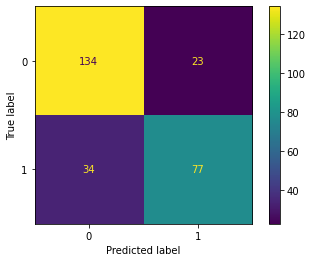

In [ ]:
conf_mat = confusion_matrix(survived_test, y_pred)
ConfusionMatrixDisplay(conf_mat).plot()